In [2]:
# example of defining the generator model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
# define the standalone generator model
def define_generator(latent_dim):
 model = Sequential()
# foundation for 7x7 image
 n_nodes = 128 * 7 * 7
 model.add(Dense(n_nodes, input_dim=latent_dim))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Reshape((7, 7, 128)))
# upsample to 14x14
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding="same"))
 model.add(LeakyReLU(alpha=0.2))
# upsample to 28x28
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding="same"))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Conv2D(1, (7,7), activation="sigmoid", padding="same"))
 return model
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file="generator_plot.png", show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 128)       0

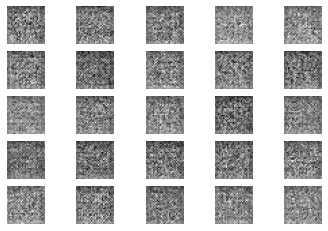

In [5]:
# example of defining and using the generator model
import tensorflow as tf
from numpy import zeros
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from matplotlib import pyplot
# define the standalone generator model
def define_generator(latent_dim):
 model = Sequential()
# foundation for 7x7 image
 n_nodes = 128 * 7 * 7
 model.add(Dense(n_nodes, input_dim=latent_dim))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Reshape((7, 7, 128)))
# upsample to 14x14
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
# upsample to 28x28
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
 return model
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
# generate points in the latent space
 x_input = randn(latent_dim * n_samples)
# reshape into a batch of inputs for the network
 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
# generate points in latent space
 x_input = generate_latent_points(latent_dim, n_samples)
# predict outputs
 X = g_model.predict(x_input)
# create ✬fake✬ class labels (0)
 y = zeros((n_samples, 1))
 return X, y
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
# define subplot
 pyplot.subplot(5, 5, 1 + i)
# turn off axis labels
 pyplot.axis('off')
# plot single image
 pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
pyplot.show()
